# Remove sentences with only 1 word

In [12]:
import pickle
import os
import pandas as pd
from tqdm import tqdm
from string import punctuation
from sacremoses import MosesTokenizer
from collections import defaultdict

punctuation_to_remove = punctuation.replace("'", "").replace("-", "")
tokenizer = MosesTokenizer(lang='en')

def dump_pickle(file_path, object):
    with open(file_path, 'wb') as handle:
        pickle.dump(object, handle)

def load_pickle(file_path):
    with open(file_path, 'rb') as handle:
        object = pickle.load(handle)
    return object


def filter_remove_1word():
    PICKLE_PATH = "../pickles"
    filtered_data = []
    
    for _, _, files in os.walk(PICKLE_PATH):
        for file in sorted(files):
            if file.startswith("tosdr_block"):
                print("Processing", file)
                block_dicts = load_pickle(PICKLE_PATH + '/' + file)
                for block_dict in tqdm(block_dicts):
                    text = block_dict["text"]
                    summary = block_dict["summary"]
                    
                    filtered_text = []
                    for sent in text:
                        words_per_sent = tokenizer.tokenize(sent.translate(str.maketrans('', '', punctuation_to_remove)))
                        if len(words_per_sent) > 1:
                            filtered_text.append(sent)
                    
                    filtered_summary = []
                    for sent in summary:
                        words_per_sent = tokenizer.tokenize(sent.translate(str.maketrans('', '', punctuation_to_remove)))
                        if len(words_per_sent) > 1:
                            filtered_summary.append(sent)
                            
                    filtered_data.append({"text": filtered_text,
                                          "summary": filtered_summary})
    dump_pickle(PICKLE_PATH + '/tosdr_v2_removed_1word.pickle', filtered_data)
                    

In [13]:
filter_remove_1word()

Processing tosdr_block_0.pickle


100%|██████████| 180/180 [00:03<00:00, 51.31it/s]


Processing tosdr_block_1.pickle


100%|██████████| 158/158 [00:02<00:00, 57.85it/s]


Processing tosdr_block_10.pickle


100%|██████████| 153/153 [00:02<00:00, 51.40it/s]


Processing tosdr_block_11.pickle


100%|██████████| 129/129 [00:01<00:00, 83.93it/s]


Processing tosdr_block_12.pickle


100%|██████████| 116/116 [00:01<00:00, 73.54it/s]


Processing tosdr_block_2.pickle


100%|██████████| 169/169 [00:02<00:00, 66.89it/s]


Processing tosdr_block_3.pickle


100%|██████████| 153/153 [00:03<00:00, 41.69it/s]


Processing tosdr_block_4.pickle


100%|██████████| 154/154 [00:02<00:00, 68.99it/s]


Processing tosdr_block_5.pickle


100%|██████████| 153/153 [00:02<00:00, 64.85it/s]


Processing tosdr_block_6.pickle


100%|██████████| 165/165 [00:02<00:00, 60.82it/s]


Processing tosdr_block_7.pickle


100%|██████████| 188/188 [00:02<00:00, 68.35it/s]


Processing tosdr_block_8.pickle


100%|██████████| 166/166 [00:02<00:00, 73.11it/s]


Processing tosdr_block_9.pickle


100%|██████████| 175/175 [00:03<00:00, 57.52it/s]


In [14]:
dicts = load_pickle("../pickles/tosdr_v2_removed_1word.pickle")
stats = []
for i, block_dict in enumerate(tqdm(dicts)):
    text = block_dict["text"]
    summary = block_dict["summary"]
    len_text, len_summary = len(text), len(summary)
    
    stats.append({ 
                    "idx_in_block": i, 
                    "num_sent_text": len_text, 
                    "num_sent_summary": len_summary,
                    "sent_ratio": len_summary / len_text,
                    })
                    
main_df = pd.DataFrame.from_records(stats)
dump_pickle('../pickles/tosdr_stats_v2_main_df.pickle', main_df)

100%|██████████| 2059/2059 [00:00<00:00, 1782470.99it/s]


# Remove outliers

In [15]:
main_df

idx_in_block  num_sent_text  num_sent_summary  sent_ratio
0                0            326                 4    0.012270
1                1             29                 5    0.172414
2                2            311                19    0.061093
3                3            338                72    0.213018
4                4            141                19    0.134752
...            ...            ...               ...         ...
2054          2054            298                15    0.050336
2055          2055             42                12    0.285714
2056          2056             53                10    0.188679
2057          2057            313                 2    0.006390
2058          2058             76                10    0.131579

[2059 rows x 4 columns]

In [16]:
main_df.describe()

idx_in_block  num_sent_text  num_sent_summary   sent_ratio
count   2059.000000    2059.000000       2059.000000  2059.000000
mean    1029.000000     221.826129         14.197183     0.099767
std      594.526422     269.213251         19.463129     0.114030
min        0.000000       3.000000          0.000000     0.000000
25%      514.500000      80.000000          3.000000     0.022648
50%     1029.000000     165.000000          8.000000     0.060606
75%     1543.500000     276.000000         19.000000     0.138288
max     2058.000000    4067.000000        358.000000     1.000000

In [18]:
filtered_data = load_pickle("../pickles/tosdr_v2_removed_1word.pickle")

In [35]:
outlier_indices = set()

## # sentences in text

<AxesSubplot:>

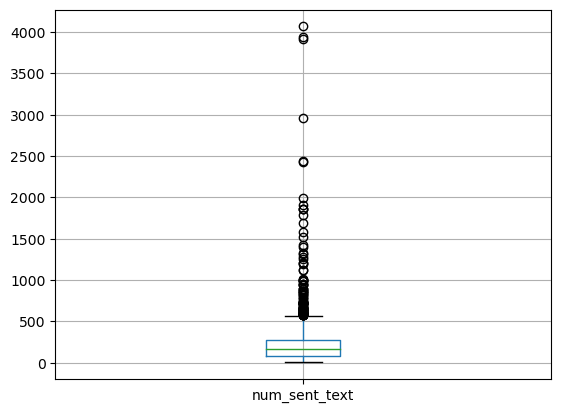

In [34]:
main_df.boxplot(column='num_sent_text')

In [53]:
main_df["num_sent_text"].quantile(0.01)

10.580000000000002

In [48]:
main_df.loc[main_df['num_sent_text'] < 10]

idx_in_block  num_sent_text  num_sent_summary  sent_ratio
39              39              6                 2    0.333333
135            135              6                 2    0.333333
217            217              6                 1    0.166667
350            350              4                 3    0.750000
832            832              3                 1    0.333333
950            950              8                 1    0.125000
1058          1058              7                 4    0.571429
1187          1187              4                 3    0.750000
1209          1209              7                 1    0.142857
1234          1234              9                 3    0.333333
1260          1260              7                 4    0.571429
1270          1270              8                 1    0.125000
1340          1340              8                 1    0.125000
1765          1765              6                 1    0.166667
1773          1773              5                 5    1.000000
1826          1826              9                 4    0.444444
1855          1855              9                 5    0.555556
1872          1872              6                 2    0.333333
1897          1897              6                 2    0.333333

In [57]:
outlier_indices.update(main_df.loc[main_df['num_sent_text'] < 10]['idx_in_block'].tolist())

## # sentences in summary

In [60]:
main_df.loc[main_df["num_sent_summary"] == 0]

idx_in_block  num_sent_text  num_sent_summary  sent_ratio
688           688            224                 0         0.0

In [61]:
outlier_indices.update(main_df.loc[main_df["num_sent_summary"] == 0]["idx_in_block"].tolist())

## sentence ratio

In [78]:
main_df['sent_ratio'].quantile(0.99)

0.5176315789473692

In [77]:
main_df.loc[main_df['sent_ratio'] >= 0.6]

idx_in_block  num_sent_text  num_sent_summary  sent_ratio
26              26            147               147    1.000000
225            225             13                13    1.000000
287            287            222               179    0.806306
350            350              4                 3    0.750000
693            693             15                 9    0.600000
802            802             60                38    0.633333
908            908            293               254    0.866894
909            909            387               358    0.925065
1151          1151             46                34    0.739130
1187          1187              4                 3    0.750000
1486          1486             17                12    0.705882
1773          1773              5                 5    1.000000
2002          2002             15                12    0.800000

In [79]:
outlier_indices.update(main_df.loc[main_df['sent_ratio'] >= 0.7]['idx_in_block'].tolist())

In [80]:
outlier_indices

{26,
 39,
 135,
 217,
 225,
 287,
 350,
 688,
 832,
 908,
 909,
 950,
 1058,
 1151,
 1187,
 1209,
 1234,
 1260,
 1270,
 1340,
 1486,
 1765,
 1773,
 1826,
 1855,
 1872,
 1897,
 2002}

# Final filtered output

In [84]:
final_df = main_df.drop(outlier_indices)

In [86]:
final_df

idx_in_block  num_sent_text  num_sent_summary  sent_ratio
0                0            326                 4    0.012270
1                1             29                 5    0.172414
2                2            311                19    0.061093
3                3            338                72    0.213018
4                4            141                19    0.134752
...            ...            ...               ...         ...
2054          2054            298                15    0.050336
2055          2055             42                12    0.285714
2056          2056             53                10    0.188679
2057          2057            313                 2    0.006390
2058          2058             76                10    0.131579

[2031 rows x 4 columns]

In [87]:
final_df.describe()

idx_in_block  num_sent_text  num_sent_summary   sent_ratio
count   2031.000000    2031.000000       2031.000000  2031.000000
mean    1028.537666     224.151649         13.873461     0.094083
std      594.214698     270.072216         16.543814     0.097406
min        0.000000      10.000000          1.000000     0.000838
25%      514.500000      82.000000          3.000000     0.022490
50%     1027.000000     166.000000          8.000000     0.059406
75%     1543.500000     278.000000         19.000000     0.135028
max     2058.000000    4067.000000        192.000000     0.633333